# Importing the Libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%pip install xgboost
import xgboost as xgb
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load the California housing dataset

In [35]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing['data']
df['target'] = california_housing['target']

# Split the data into features (X) and target variable (y)

In [36]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regressor and set hyperparameters


In [38]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=0.01
)

# Convert the dataset to DMatrix format for better performance


In [39]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the evaluation set

In [40]:
eval_set = [(dtrain, 'train'), (dtest, 'test')]

# Train the model

In [41]:
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)

c:\Users\kulsh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:925: UserWarning: Unknown data type: <class 'xgboost.core.DMatrix'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: Not supported type for data.<class 'xgboost.core.DMatrix'>

# Make predictions on the test set


In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the evaluation results

In [ ]:
eval_results = model.evals_result()
train_loss = eval_results['train']['rmse']
test_loss = eval_results['test']['rmse']

# Plot the training and validation loss

In [ ]:
epochs = len(train_loss)
x_axis = range(0, epochs)
plt.plot(x_axis, train_loss, label='Train')
plt.plot(x_axis, test_loss, label='Test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

XGBoostError: No evaluation result, `eval_set` is not used during training.

# Plot the predicted versus actual values

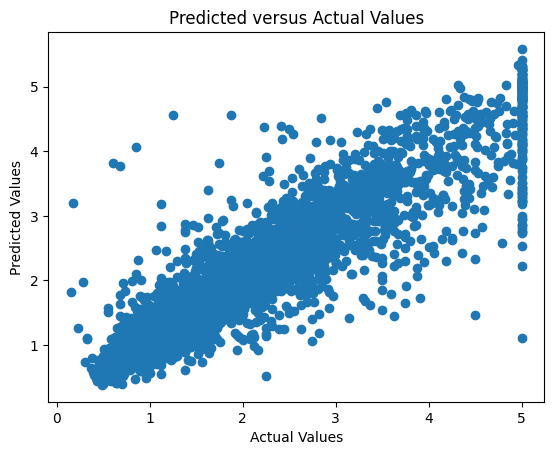

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted versus Actual Values')
plt.show()

# Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.22458289556216388
R-squared: 0.828616180679985
